In [1]:
import numpy as np
import gym
from gym import wrappers
import gym_custom_envs
import time as tt
from gekko import GEKKO
env = gym.make('DoubleIntegrator-v0')
# env = gym.wrappers.Monitor(env, "vid", force=True)
m = GEKKO(remote=False)

In [2]:
# Time space we will go beyond the 2.2s
#to check if the objective was achieved
T = 5
m.time = np.linspace(0,T,int(T/env.dt))
final = np.zeros(len(m.time))
for i in range(len(m.time)):
    final[i] = 1
final = m.Param(value=final)

In [3]:
# Control Force
ui = m.Var(value=0, lb=-1,ub=1)

s = env.reset().reshape(2, 1)

#State Variables
xi = m.Var(value=s[0, 0], lb = -env.map_limit + 0.1, ub = env.map_limit - 0.1)
vi = m.Var(value=s[1, 0])

In [4]:
#Defining the State Space Model
m.Equation(xi.dt() == vi)
m.Equation(vi.dt() == ui)

In [5]:
# Definine the Objectives
# Make all the state variables be zero at time >= 2.2
m.Obj(xi**2)
m.Obj(vi**2)

#Try to minimize change of MV over all horizon
m.Obj(ui**2)

In [6]:
m.options.IMODE = 6 # MPC
m.options.SOLVER = 3
m.solve(disp=False) #(disp=False)


<IPython.core.display.Javascript object>


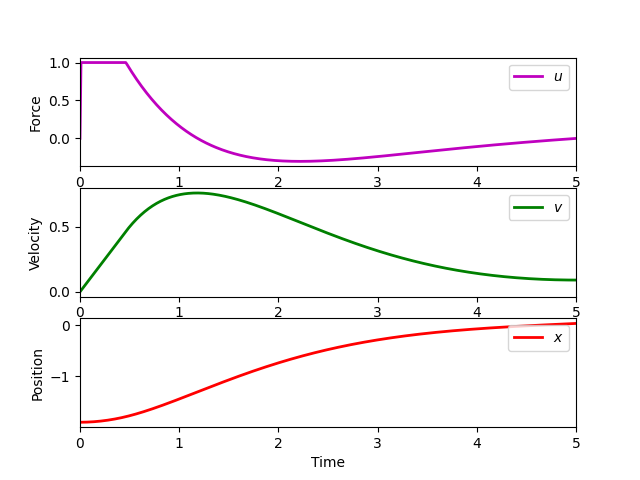

(0.0, 5.0)

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(m.time,ui.value,'m',lw=2)
plt.legend([r'$u$'],loc=1)
plt.ylabel('Force')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])
plt.subplot(312)
plt.plot(m.time,vi.value,'g',lw=2)
plt.legend([r'$v$'],loc=1)
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])
plt.subplot(313)
plt.plot(m.time,xi.value,'r',lw=2)
plt.legend([r'$x$'],loc=1)
plt.ylabel('Position')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

In [8]:
done = False

j = 0
while not done:
    a = ui.value[j]
    ns, c, done,_ = env.step(a)
    env.render()
    j += 1
#    tt.sleep(0.025)
#    clear_output(wait=True)
env.close()

In [9]:
print(ns, done)

[-0.01764283  0.09962701] True
